## Task 1: Define an RL Environment

Initial Position: [0 0]


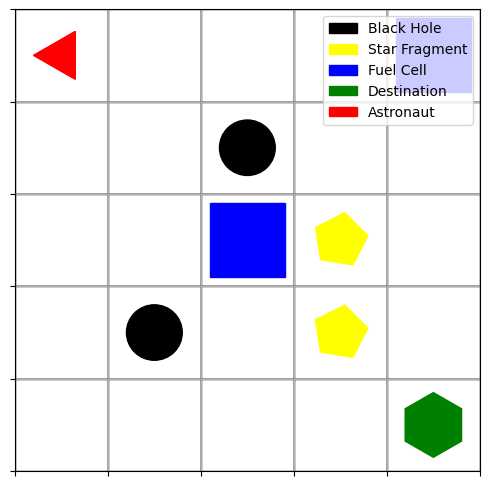


Astronaut's Journey Begins:

Step 1:
  Action Taken: Right
  New Position: [0 1]
  Reward Received: -1
  Mission Status: In Progress


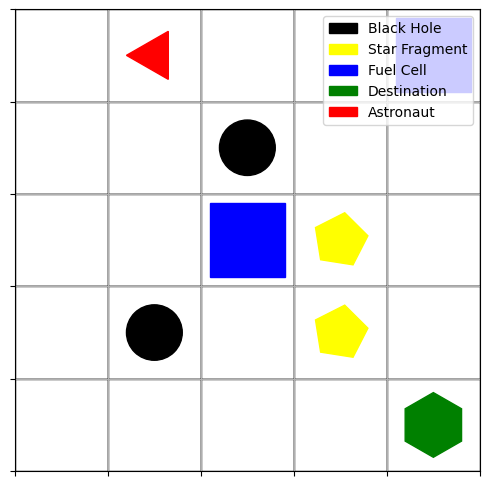

Step 2:
  Action Taken: Left
  New Position: [0 0]
  Reward Received: -1
  Mission Status: In Progress


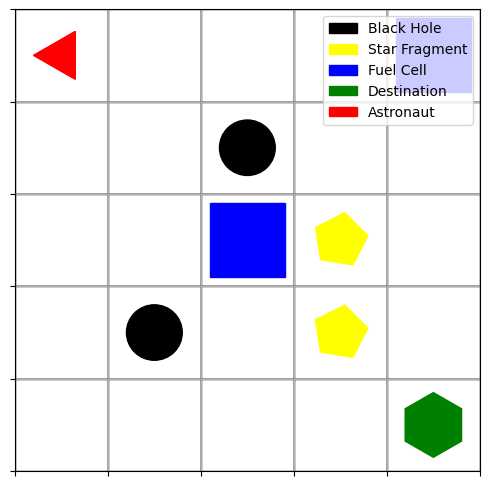

Step 3:
  Action Taken: Left
  New Position: [0 0]
  Reward Received: -1
  Mission Status: In Progress


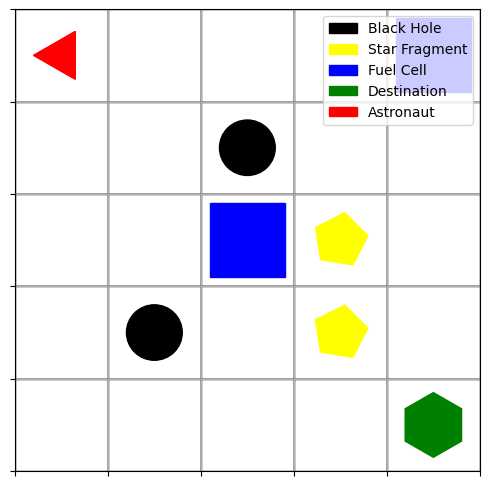

Step 4:
  Action Taken: Down
  New Position: [1 0]
  Reward Received: -1
  Mission Status: In Progress


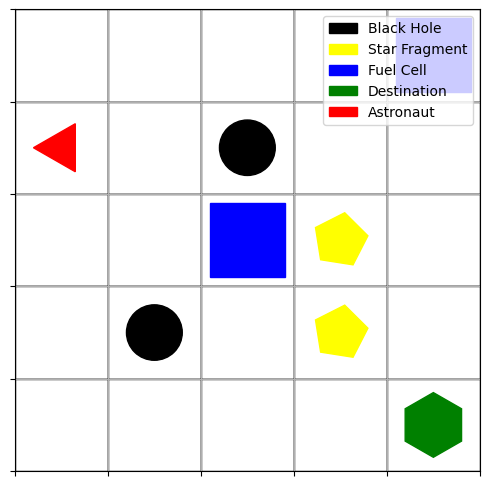

Step 5:
  Action Taken: Right
  New Position: [1 1]
  Reward Received: -1
  Mission Status: In Progress


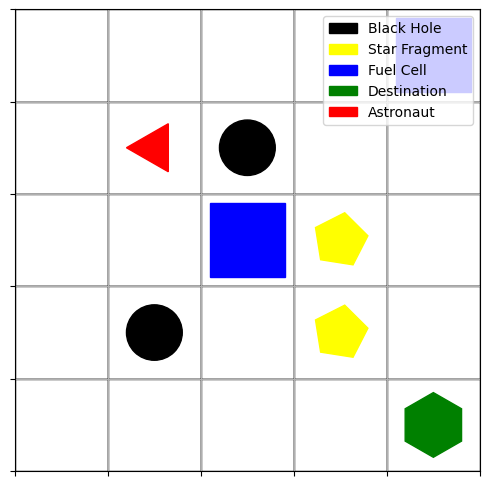

Step 6:
  Action Taken: Up
  New Position: [0 1]
  Reward Received: -1
  Mission Status: In Progress


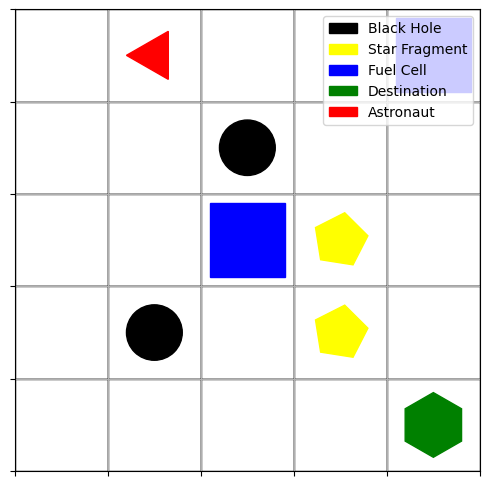

Step 7:
  Action Taken: Up
  New Position: [0 1]
  Reward Received: -1
  Mission Status: In Progress


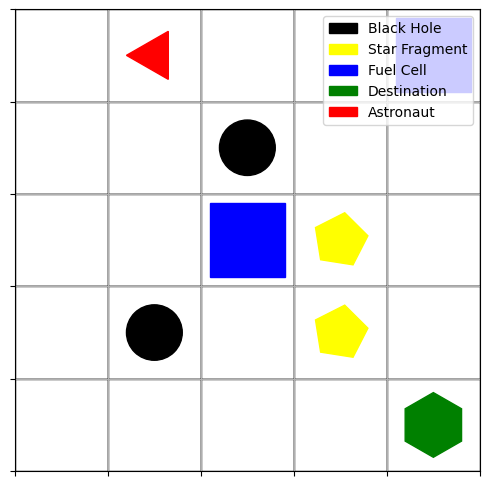

Step 8:
  Action Taken: Down
  New Position: [1 1]
  Reward Received: -1
  Mission Status: In Progress


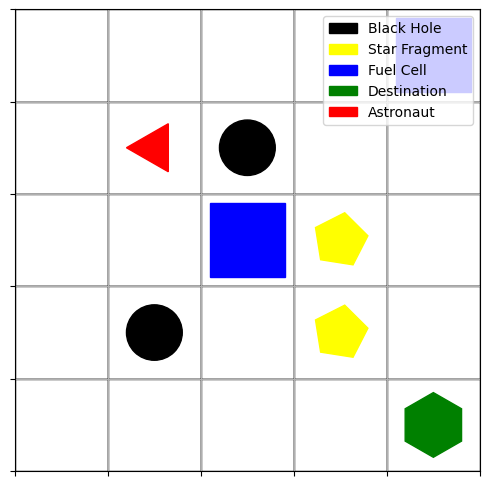

Step 9:
  Action Taken: Down
  New Position: [2 1]
  Reward Received: -1
  Mission Status: In Progress


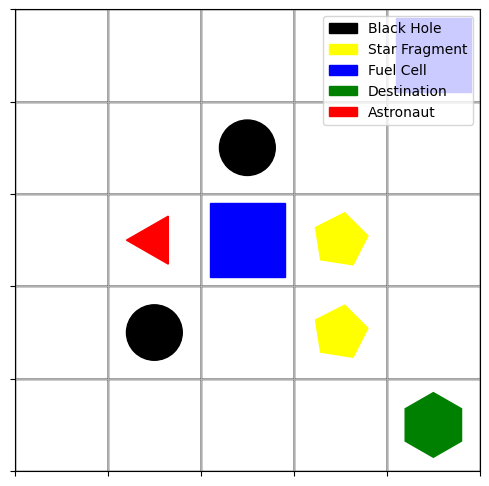

Step 10:
  Action Taken: Up
  New Position: [1 1]
  Reward Received: -1
  Mission Status: In Progress


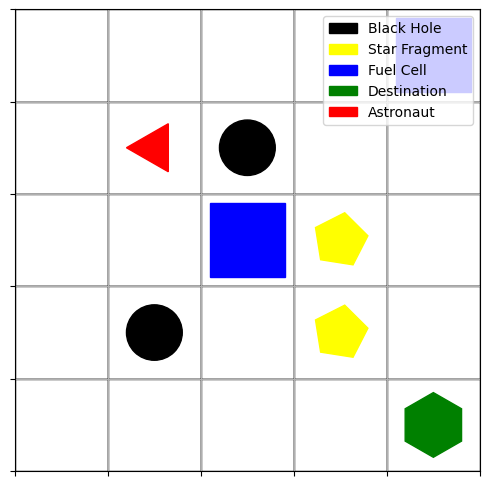

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from gym import Env
from gym.spaces import Discrete, Box

class SpaceMissionEnv(Env):
    def __init__(self):
        super().__init__()
        self.grid_size = (5, 5)
        self.action_space = Discrete(4)
        self.observation_space = Box(low=0, high=max(self.grid_size)-1, shape=(2,), dtype=np.int32)


        self.state = np.array([0, 0])
        self.destination = np.array([4, 4])
        self.black_holes = [np.array([1, 2]), np.array([3, 1])]
        self.star_fragments = [np.array([2, 3]), np.array([3, 3])]
        self.fuel_cells = [np.array([0, 4]), np.array([2, 2])]

        self.rewards = {
            "reach_destination": 100,
            "black_hole": -50,
            "collect_star_fragment": 30,
            "collect_fuel_cell": 10,
            "move_penalty": -1
        }

    def reset(self):
        self.state = np.array([0, 0])
        self.star_fragments = [np.array([2, 3]), np.array([3, 3])]
        self.fuel_cells = [np.array([0, 4]), np.array([2, 2])]
        return self.state.copy()

    def step(self, action):
        action_dict = {
            0: np.array([-1, 0]),
            1: np.array([1, 0]),
            2: np.array([0, -1]),
            3: np.array([0, 1])
        }
        new_state = self.state + action_dict[action]
        new_state = np.clip(new_state, [0, 0], np.array(self.grid_size) - 1)

        self.state = new_state
        reward = self.rewards["move_penalty"]
        done = False

        if np.array_equal(self.state, self.destination):
            reward += self.rewards["reach_destination"]
            done = True
        elif any(np.array_equal(self.state, bh) for bh in self.black_holes):
            reward += self.rewards["black_hole"]
            done = True
        elif any(np.array_equal(self.state, sf) for sf in self.star_fragments):
            reward += self.rewards["collect_star_fragment"]
            self.star_fragments = [sf for sf in self.star_fragments if not np.array_equal(sf, self.state)]
        elif any(np.array_equal(self.state, fc) for fc in self.fuel_cells):
            reward += self.rewards["collect_fuel_cell"]
            self.fuel_cells = [fc for fc in self.fuel_cells if not np.array_equal(fc, self.state)]

        return self.state.copy(), reward, done, {}

    def render(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_xlim(-0.5, self.grid_size[1] - 0.5)
        ax.set_ylim(-0.5, self.grid_size[0] - 0.5)
        ax.set_xticks(np.arange(-0.5, self.grid_size[1], 1))
        ax.set_yticks(np.arange(-0.5, self.grid_size[0], 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True)
        ax.invert_yaxis()

        for x in range(self.grid_size[1]):
            for y in range(self.grid_size[0]):
                rect = patches.Rectangle((x - 0.5, y - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        for bh in self.black_holes:
            ax.add_patch(patches.Circle((bh[1], bh[0]), radius=0.3, color='black', label='Black Hole'))

        for sf in self.star_fragments:
            ax.add_patch(patches.RegularPolygon((sf[1], sf[0]), numVertices=5, radius=0.3,
                                                orientation=np.pi/4, color='yellow', label='Star Fragment'))

        for fc in self.fuel_cells:
            ax.add_patch(patches.Rectangle((fc[1] - 0.4, fc[0] - 0.4), 0.8, 0.8, color='blue', label='Fuel Cell'))

        ax.add_patch(patches.RegularPolygon((self.destination[1], self.destination[0]), numVertices=6,
                                            radius=0.35, orientation=0, color='green', label='Destination'))

        ax.add_patch(patches.RegularPolygon((self.state[1], self.state[0]), numVertices=3, radius=0.3,
                                            orientation=np.pi/2, color='red', label='Astronaut'))

        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='upper right')

        plt.show()
        plt.close(fig)

env = SpaceMissionEnv()

state = env.reset()
print(f"Initial Position: {state}")
env.render()

print("\nAstronaut's Journey Begins:\n")
for t in range(10):
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    action_name = ['Up', 'Down', 'Left', 'Right'][action]

    print(f"Step {t+1}:")
    print(f"  Action Taken: {action_name}")
    print(f"  New Position: {next_state}")
    print(f"  Reward Received: {reward}")
    print(f"  Mission Status: {'In Progress' if not done else 'Completed' if reward >= 0 else 'Failed'}")

    env.render()

    if done:
        if reward >= 0:
            print("Success! The astronaut has reached the destination planet.")
        else:
            print("Oh no! The astronaut fell into a black hole.")
        break


## Task 2: Implement SARSA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Performance: 16155 | Gamma: 0.8, Epsilon Decay: 0.99
Performance: 15434 | Gamma: 0.8, Epsilon Decay: 0.995
Performance: 706 | Gamma: 0.8, Epsilon Decay: 0.999
Performance: 15978 | Gamma: 0.9, Epsilon Decay: 0.99
Performance: 8559 | Gamma: 0.9, Epsilon Decay: 0.995
Performance: 1213 | Gamma: 0.9, Epsilon Decay: 0.999
Performance: 15988 | Gamma: 0.99, Epsilon Decay: 0.99
Performance: 13298 | Gamma: 0.99, Epsilon Decay: 0.995
Performance: 2408 | Gamma: 0.99, Epsilon Decay: 0.999

Optimal Hyperparameters Found: Gamma=0.8, Epsilon Decay=0.99


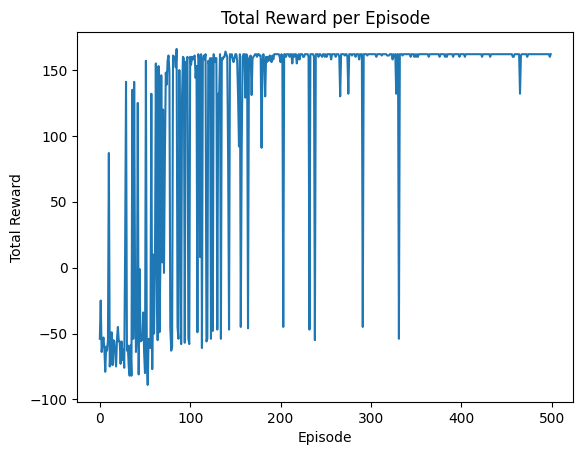

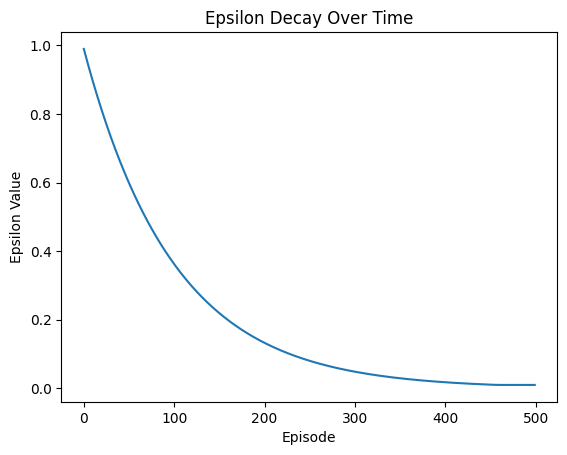


Initial Q Table (Before Training)
Position (0, 0): Q-values [0. 0. 0. 0.]
Position (0, 1): Q-values [0. 0. 0. 0.]
Position (0, 2): Q-values [0. 0. 0. 0.]
Position (0, 3): Q-values [0. 0. 0. 0.]
Position (0, 4): Q-values [0. 0. 0. 0.]
Position (1, 0): Q-values [0. 0. 0. 0.]
Position (1, 1): Q-values [0. 0. 0. 0.]
Position (1, 2): Q-values [0. 0. 0. 0.]
Position (1, 3): Q-values [0. 0. 0. 0.]
Position (1, 4): Q-values [0. 0. 0. 0.]
Position (2, 0): Q-values [0. 0. 0. 0.]
Position (2, 1): Q-values [0. 0. 0. 0.]
Position (2, 2): Q-values [0. 0. 0. 0.]
Position (2, 3): Q-values [0. 0. 0. 0.]
Position (2, 4): Q-values [0. 0. 0. 0.]
Position (3, 0): Q-values [0. 0. 0. 0.]
Position (3, 1): Q-values [0. 0. 0. 0.]
Position (3, 2): Q-values [0. 0. 0. 0.]
Position (3, 3): Q-values [0. 0. 0. 0.]
Position (3, 4): Q-values [0. 0. 0. 0.]
Position (4, 0): Q-values [0. 0. 0. 0.]
Position (4, 1): Q-values [0. 0. 0. 0.]
Position (4, 2): Q-values [0. 0. 0. 0.]
Position (4, 3): Q-values [0. 0. 0. 0.]
Posit

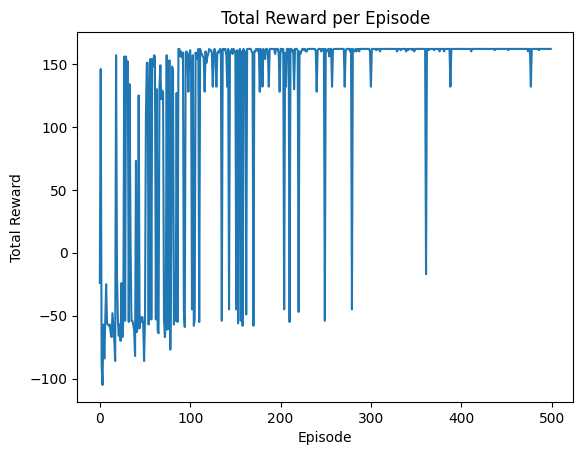

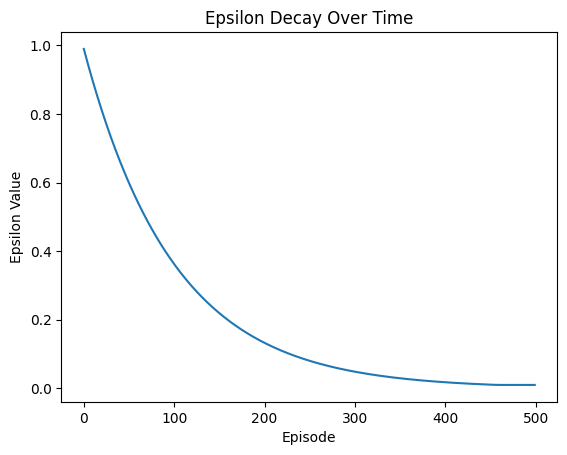

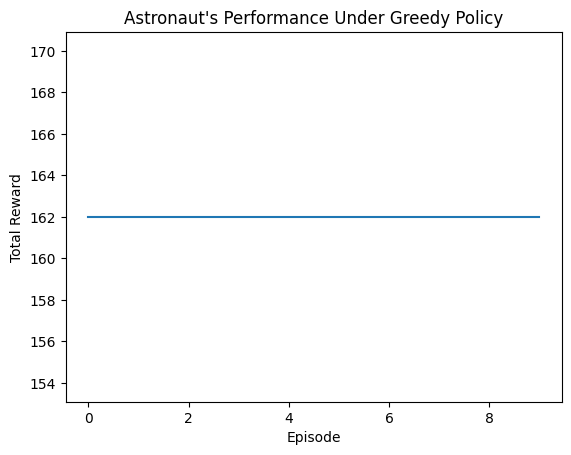

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict


def initialize_navigation_map(env):
    Q = {}
    for x in range(env.grid_size[0]):
        for y in range(env.grid_size[1]):
            state = (x, y)
            Q[state] = np.zeros(env.action_space.n)
    return Q

def display_navigation_map(Q, title):
    print(f"\n{title}")
    for state_key in sorted(Q.keys()):
        print(f"Position {state_key}: Q-values {Q[state_key]}")

def astronaut_policy(Q, state, epsilon, env):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        state_key = tuple(state)
        return np.argmax(Q[state_key])

def sarsa_learning(env, num_episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min):
    Q = initialize_navigation_map(env)
    initial_Q = {k: v.copy() for k, v in Q.items()}
    rewards_per_episode = []
    epsilon_values = []

    for episode in range(num_episodes):
        state = env.reset()
        state_key = tuple(state)
        action = astronaut_policy(Q, state, epsilon, env)
        total_reward = 0

        while True:
            next_state, reward, done, _ = env.step(action)
            next_state_key = tuple(next_state)
            next_action = astronaut_policy(Q, next_state, epsilon, env)

            Q[state_key][action] += alpha * (reward + gamma * Q[next_state_key][next_action] - Q[state_key][action])

            state_key = next_state_key
            action = next_action
            total_reward += reward

            if done:
                break

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

    return initial_Q, Q, rewards_per_episode, epsilon_values

def evaluate_astronaut_policy(Q, env, num_episodes=10):
    total_rewards = []
    for _ in range(num_episodes):
        state = env.reset()
        state_key = tuple(state)
        total_reward = 0
        while True:
            action = np.argmax(Q[state_key])
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            state_key = tuple(next_state)
            if done:
                break
        total_rewards.append(total_reward)

    plt.plot(total_rewards)
    plt.title("Astronaut's Performance Under Greedy Policy")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

def plot_learning_progress(rewards, epsilon_values):
    plt.figure()
    plt.plot(rewards)
    plt.title("Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

    plt.figure()
    plt.plot(epsilon_values)
    plt.title("Epsilon Decay Over Time")
    plt.xlabel("Episode")
    plt.ylabel("Epsilon Value")
    plt.show()


def hyperparameter_optimization(env):
    num_episodes = 500
    gammas = [0.8, 0.9, 0.99]
    epsilon_decays = [0.99, 0.995, 0.999]

    best_performance = float('-inf')
    best_params = None

    for gamma in gammas:
        for epsilon_decay in epsilon_decays:
            _, Q, rewards, epsilon_values = sarsa_learning(
                env, num_episodes, alpha=0.1, gamma=gamma,
                epsilon=1.0, epsilon_decay=epsilon_decay, epsilon_min=0.01)
            performance = sum(rewards[-100:])
            print(f"Performance: {performance} | Gamma: {gamma}, Epsilon Decay: {epsilon_decay}")
            if performance > best_performance:
                best_performance = performance
                best_params = (gamma, epsilon_decay)
                best_rewards = rewards
                best_epsilon_values = epsilon_values
                best_Q = Q.copy()
    print(f"\nOptimal Hyperparameters Found: Gamma={best_params[0]}, Epsilon Decay={best_params[1]}")
    plot_learning_progress(best_rewards, best_epsilon_values)
    return best_params, best_Q


env = SpaceMissionEnv()
best_params, best_Q = hyperparameter_optimization(env)

initial_Q, trained_Q, rewards, epsilon_values = sarsa_learning(
    env,
    num_episodes=500,
    alpha=0.1,
    gamma=best_params[0],
    epsilon=1.0,
    epsilon_decay=best_params[1],
    epsilon_min=0.01
)


display_navigation_map(initial_Q, "Initial Q Table (Before Training)")
display_navigation_map(trained_Q, "Trained Q Table (After Training)")


plot_learning_progress(rewards, epsilon_values)
evaluate_astronaut_policy(trained_Q, env)



## Task 3: Implement N-step Double Q-learning

In [3]:
#Experiment with hyperparameters
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import itertools

class DoubleQLearningAgent:
    def __init__(self, env, n=1, gamma=0.99, alpha=0.1, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1):
        self.env = env
        self.n = n
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q1 = np.zeros((env.grid_size[0], env.grid_size[1], env.action_space.n))
        self.Q2 = np.zeros((env.grid_size[0], env.grid_size[1], env.action_space.n))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        q_sum = self.Q1[state[0], state[1], :] + self.Q2[state[0], state[1], :]
        return np.argmax(q_sum)

    def learn(self, episodes, max_steps):
        rewards_per_episode = []
        epsilon_values = []

        for ep in range(episodes):
            state = self.env.reset()
            rewards = 0
            trajectory = deque(maxlen=self.n)

            for t in range(max_steps):
                action = self.choose_action(state)
                next_state, reward, done, _ = self.env.step(action)
                trajectory.append((state, action, reward))
                rewards += reward

                if len(trajectory) == self.n or done:
                    g = sum((self.gamma ** i) * traj[2] for i, traj in enumerate(trajectory))
                    if not done:
                        g += (self.gamma ** self.n) * (
                            self.Q1[next_state[0], next_state[1], :].max() +
                            self.Q2[next_state[0], next_state[1], :].max()
                        ) / 2

                    update_state, update_action, _ = trajectory[0]
                    if np.random.rand() < 0.5:
                        self.Q1[update_state[0], update_state[1], update_action] += \
                            self.alpha * (g - self.Q1[update_state[0], update_state[1], update_action])
                    else:
                        self.Q2[update_state[0], update_state[1], update_action] += \
                            self.alpha * (g - self.Q2[update_state[0], update_state[1], update_action])

                state = next_state
                if done:
                    break

            rewards_per_episode.append(rewards)
            epsilon_values.append(self.epsilon)
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

        return rewards_per_episode, epsilon_values

    def evaluate(self, episodes, max_steps):
        total_rewards = []
        for ep in range(episodes):
            state = self.env.reset()
            rewards = 0
            for t in range(max_steps):
                q_sum = self.Q1[state[0], state[1], :] + self.Q2[state[0], state[1], :]
                action = np.argmax(q_sum)
                next_state, reward, done, _ = self.env.step(action)
                rewards += reward
                state = next_state
                if done:
                    break
            total_rewards.append(rewards)
        return total_rewards

def hyperparameter_tuning(env, n_values, param_grid, episodes, max_steps):
    results = {}

    for n in n_values:
        print(f"\nTuning hyperparameters for n={n}")
        best_setup = None
        best_avg_reward = -float('inf')

        for params in itertools.product(*param_grid.values()):
            gamma, alpha, epsilon, epsilon_decay, epsilon_min = params
            print(f"Trying parameters: gamma={gamma}, alpha={alpha}, epsilon={epsilon}, "
                  f"epsilon_decay={epsilon_decay}, epsilon_min={epsilon_min}")

            agent = DoubleQLearningAgent(
                env, n=n, gamma=gamma, alpha=alpha, epsilon=epsilon,
                epsilon_decay=epsilon_decay, epsilon_min=epsilon_min
            )
            rewards, _ = agent.learn(episodes=episodes, max_steps=max_steps)
            avg_reward = np.mean(rewards[-100:])

            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
                best_setup = {
                    "gamma": gamma, "alpha": alpha, "epsilon": epsilon,
                    "epsilon_decay": epsilon_decay, "epsilon_min": epsilon_min
                }

        results[n] = {"best_setup": best_setup, "best_avg_reward": best_avg_reward}
        print(f"Best setup for n={n}: {best_setup} with average reward {best_avg_reward}")

    return results

env = SpaceMissionEnv()

param_grid = {
    "gamma": [0.95, 0.99],
    "alpha": [0.1, 0.01],
    "epsilon": [1.0],
    "epsilon_decay": [0.99, 0.995],
    "epsilon_min": [0.1, 0.01]
}

n_values = [1, 2, 3, 4, 5]

tuning_results = hyperparameter_tuning(env, n_values, param_grid, episodes=500, max_steps=100)

print("\nFinal Results:")
for n, result in tuning_results.items():
    print(f"n={n}: Best Hyperparameters: {result['best_setup']}, Avg Reward: {result['best_avg_reward']}")



Tuning hyperparameters for n=1
Trying parameters: gamma=0.95, alpha=0.1, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.1
Trying parameters: gamma=0.95, alpha=0.1, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01
Trying parameters: gamma=0.95, alpha=0.1, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1
Trying parameters: gamma=0.95, alpha=0.1, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01
Trying parameters: gamma=0.95, alpha=0.01, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.1
Trying parameters: gamma=0.95, alpha=0.01, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01
Trying parameters: gamma=0.95, alpha=0.01, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1
Trying parameters: gamma=0.95, alpha=0.01, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01
Trying parameters: gamma=0.99, alpha=0.1, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.1
Trying parameters: gamma=0.99, alpha=0.1, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01
Trying parameters: gamma=0.99, alpha=0.1, eps


Training and evaluating for n=1
Initial Q1 for n=1:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Initial Q2 for n=1:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Trained Q1 for n=1:
[[[ 5.35694547e+01  2.50065802e+01  5.01934430e+01  1.49259946e+02]
  [ 8.53113378e+01 

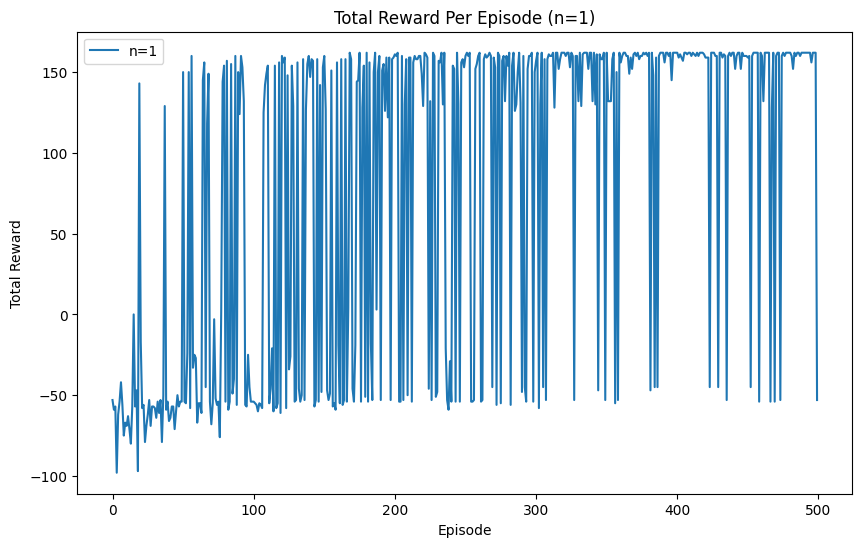

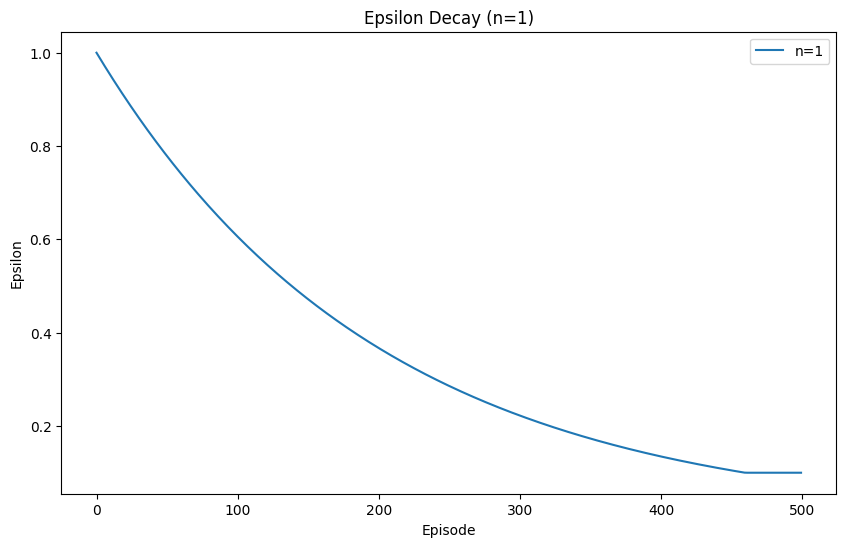

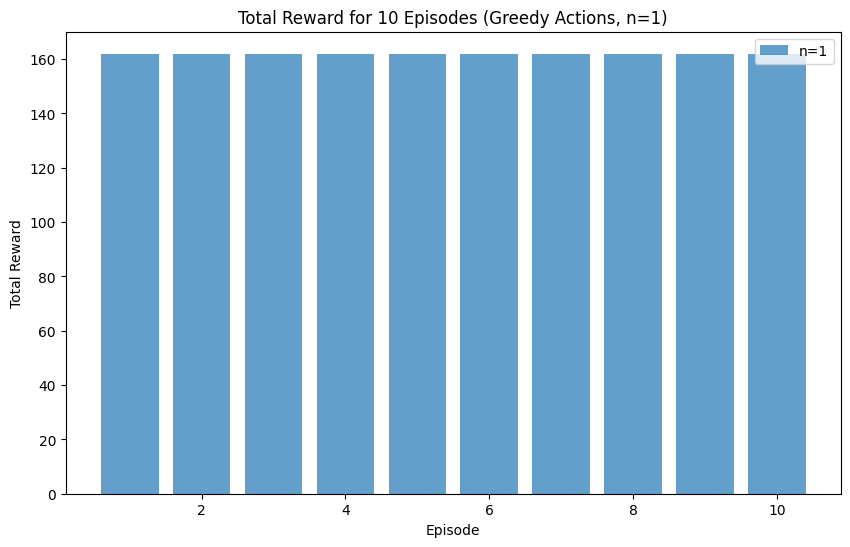


Training and evaluating for n=2
Initial Q1 for n=2:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Initial Q2 for n=2:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Trained Q1 for n=2:
[[[ 4.42985321e+01  6.25394732e+01  3.15647426e+01  4.85009388e+01]
  [ 2.86175283e+00 

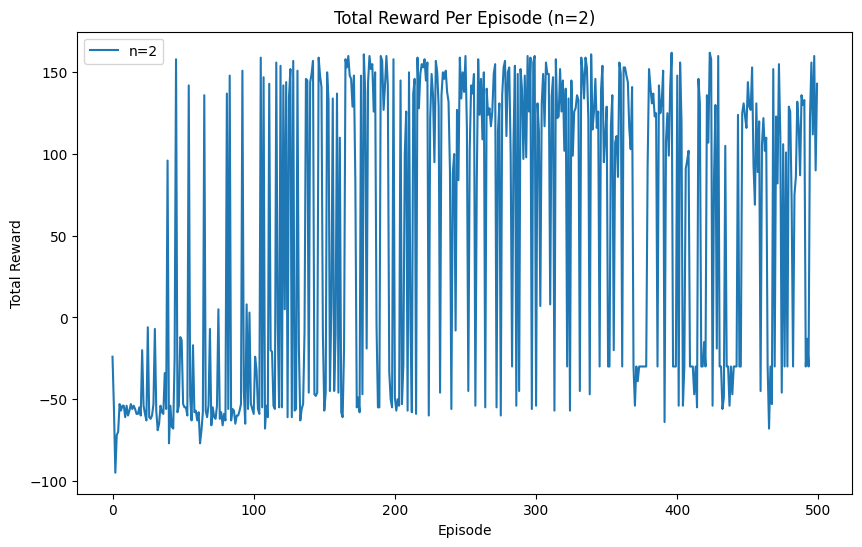

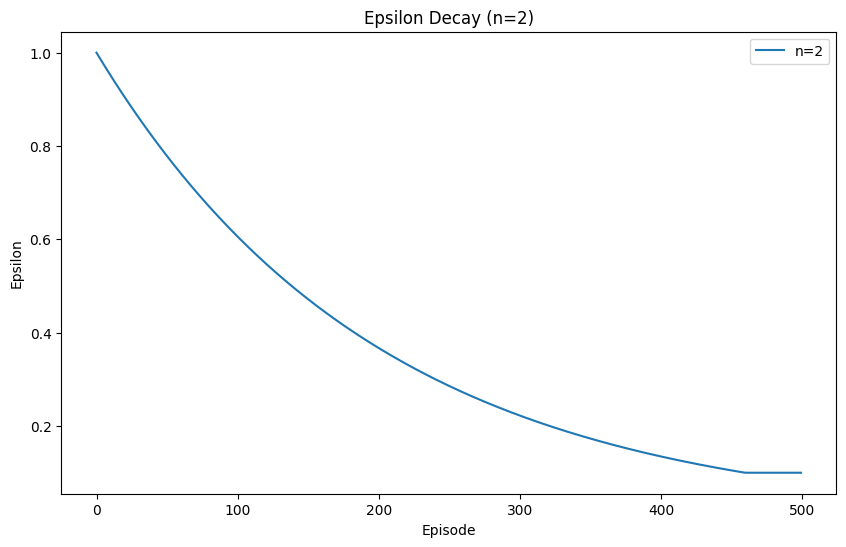

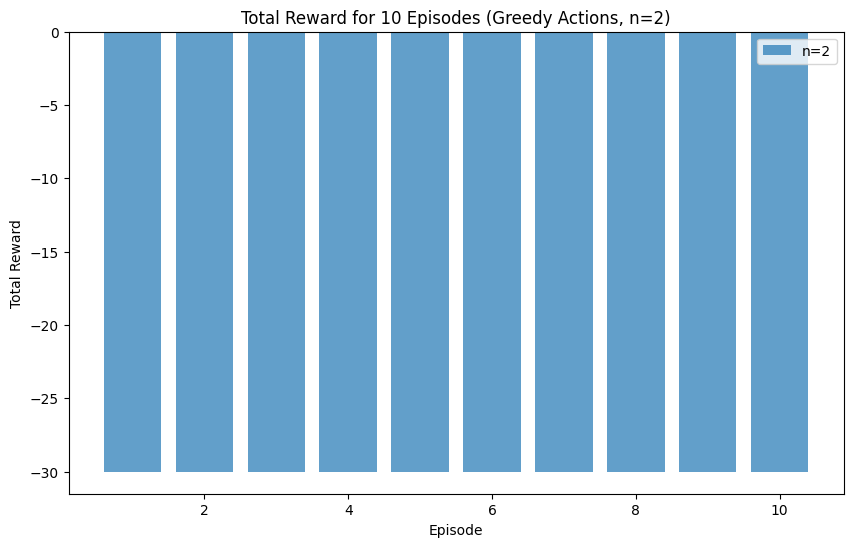


Training and evaluating for n=3
Initial Q1 for n=3:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Initial Q2 for n=3:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Trained Q1 for n=3:
[[[ 2.30539398e+01  1.34555430e+01  3.39346321e+01  4.46156253e+01]
  [ 8.78349827e+00 

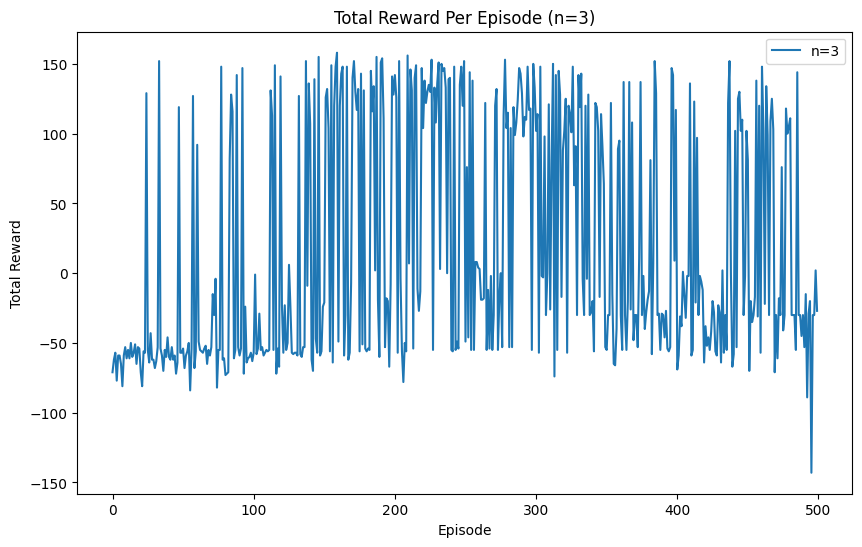

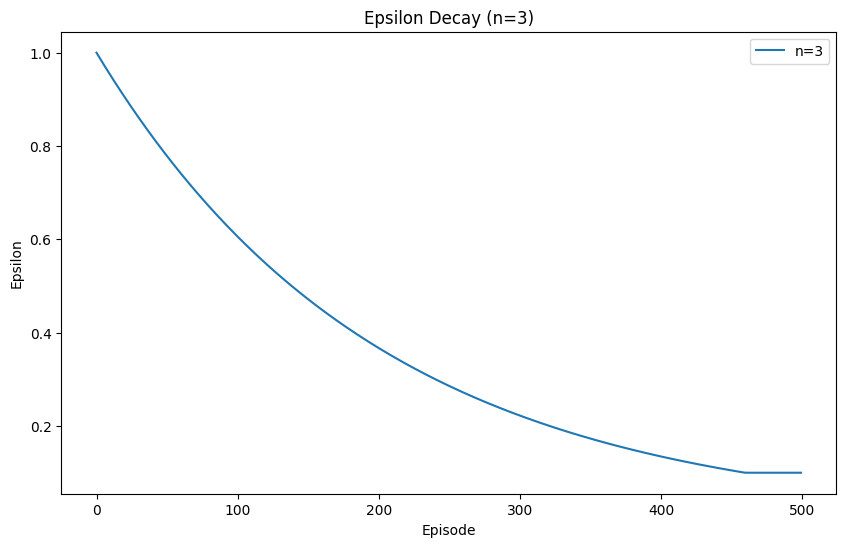

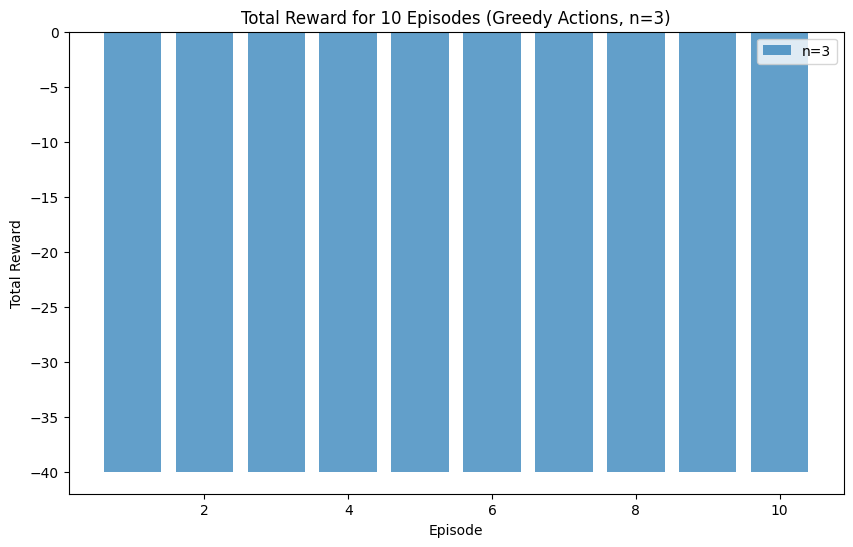


Training and evaluating for n=4
Initial Q1 for n=4:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Initial Q2 for n=4:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Trained Q1 for n=4:
[[[ 25.65918675  35.13103296  20.943333    32.14985685]
  [ 26.12973352  32.97010846  3

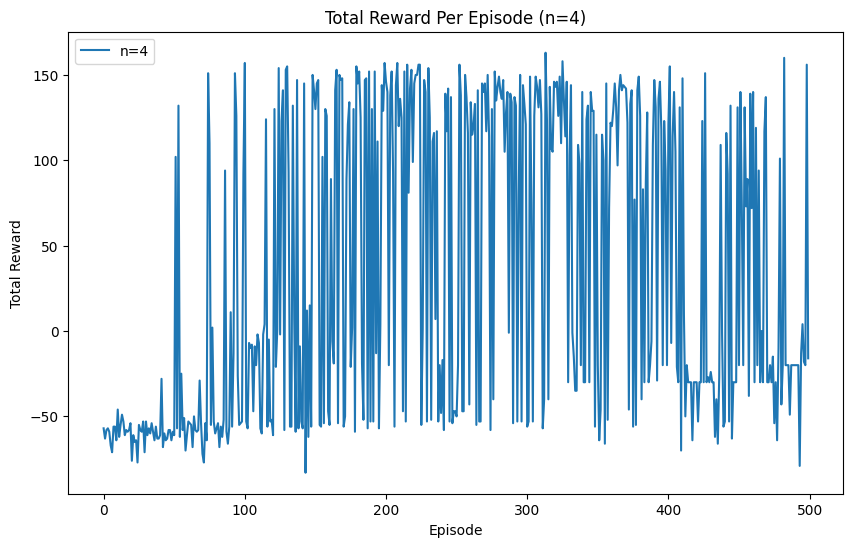

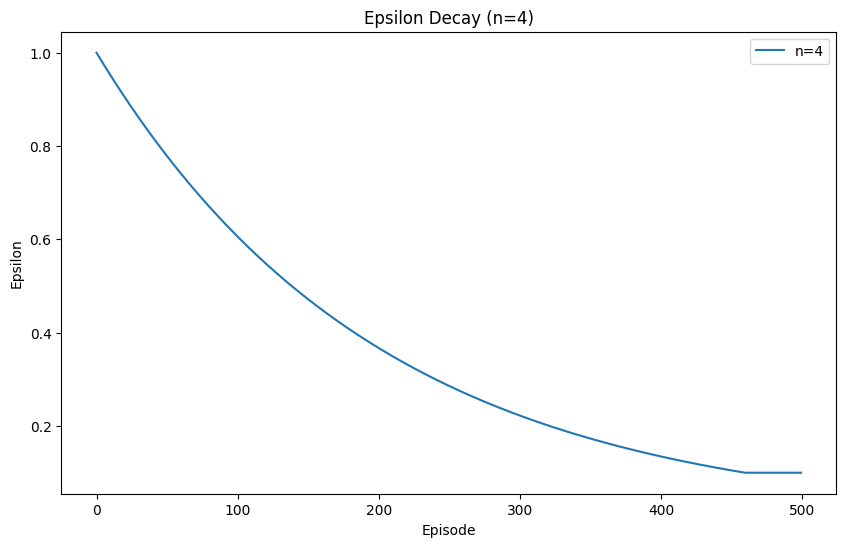

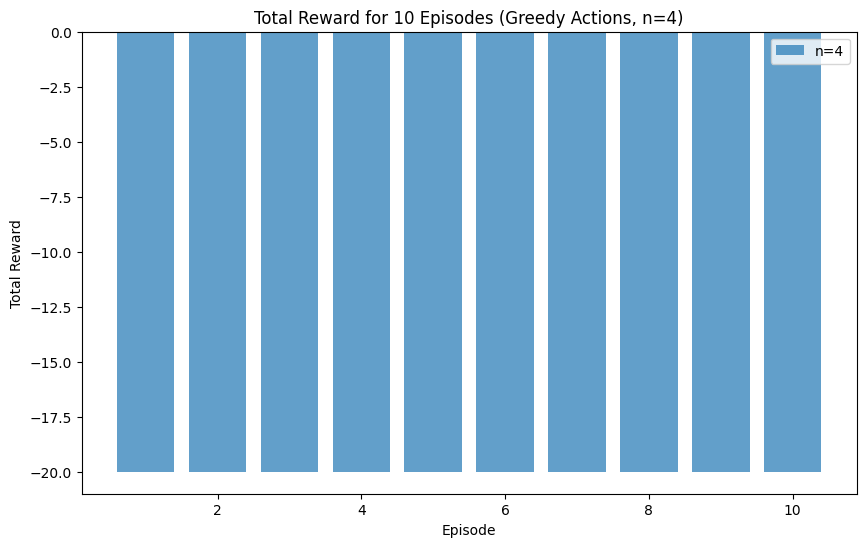


Training and evaluating for n=5
Initial Q1 for n=5:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Initial Q2 for n=5:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Trained Q1 for n=5:
[[[11.91503668  8.25100869 12.11319136  8.51383457]
  [12.97770565 18.33007442 16.90067

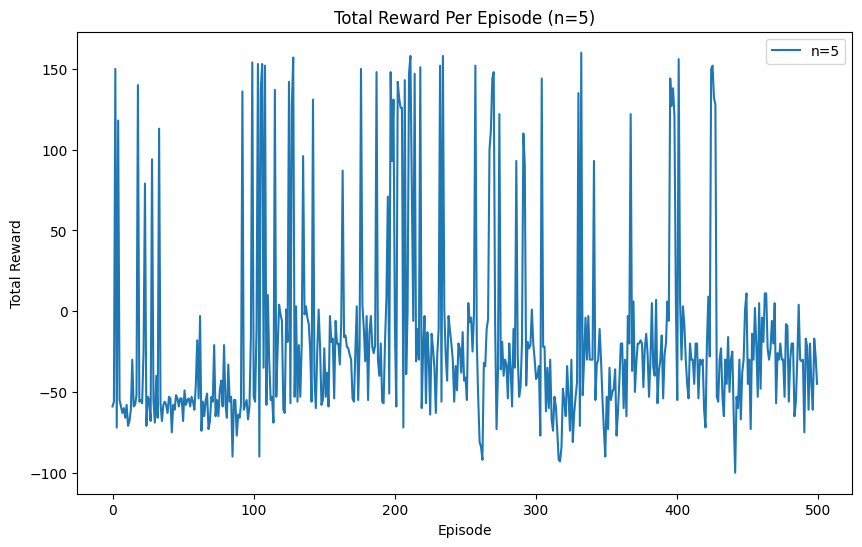

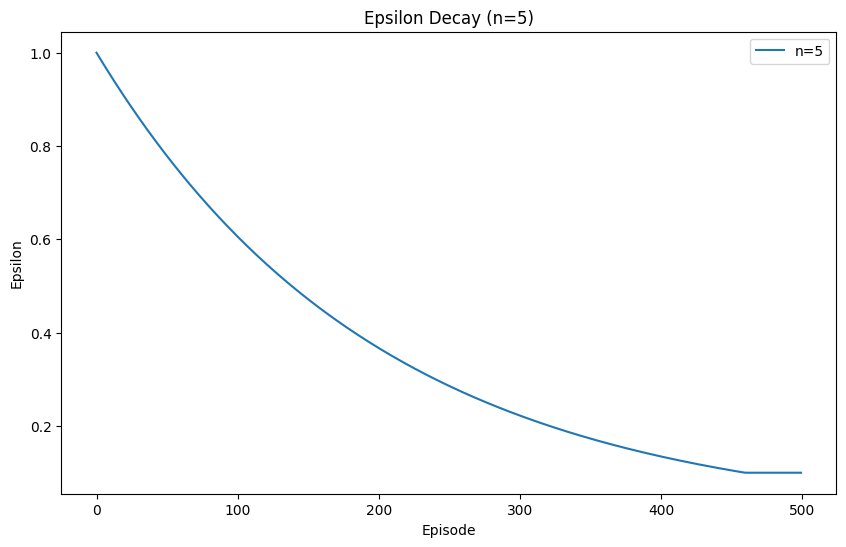

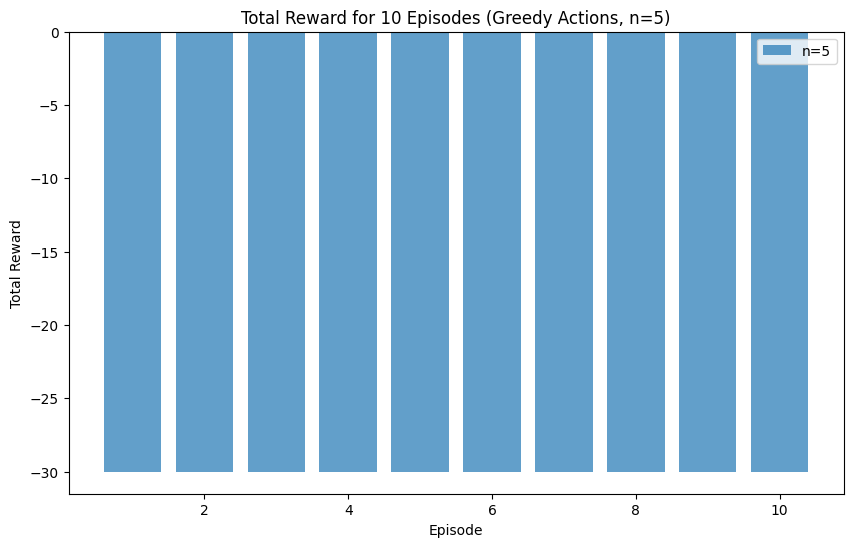


Final Results:
n=1:
  Avg Training Reward: 141.13
  Total Rewards (Evaluation): [162, 162, 162, 162, 162, 162, 162, 162, 162, 162]

n=2:
  Avg Training Reward: 54.72
  Total Rewards (Evaluation): [-30, -30, -30, -30, -30, -30, -30, -30, -30, -30]

n=3:
  Avg Training Reward: 4.5
  Total Rewards (Evaluation): [-40, -40, -40, -40, -40, -40, -40, -40, -40, -40]

n=4:
  Avg Training Reward: 13.47
  Total Rewards (Evaluation): [-20, -20, -20, -20, -20, -20, -20, -20, -20, -20]

n=5:
  Avg Training Reward: -23.11
  Total Rewards (Evaluation): [-30, -30, -30, -30, -30, -30, -30, -30, -30, -30]



In [4]:
# Determine the optimal n step
def train_and_evaluate(env, n_values, param_grid, episodes, max_steps):
    results = {}

    for n in n_values:
        print(f"\nTraining and evaluating for n={n}")

        gamma, alpha, epsilon, epsilon_decay, epsilon_min = param_grid[n]
        agent = DoubleQLearningAgent(
            env, n=n, gamma=gamma, alpha=alpha, epsilon=epsilon,
            epsilon_decay=epsilon_decay, epsilon_min=epsilon_min
        )

        print(f"Initial Q1 for n={n}:\n{agent.Q1}")
        print(f"Initial Q2 for n={n}:\n{agent.Q2}")

        train_rewards, epsilon_values = agent.learn(episodes=episodes, max_steps=max_steps)

        print(f"Trained Q1 for n={n}:\n{agent.Q1}")
        print(f"Trained Q2 for n={n}:\n{agent.Q2}")

        eval_rewards = agent.evaluate(episodes=10, max_steps=max_steps)

        results[n] = {
            "train_rewards": train_rewards,
            "epsilon_values": epsilon_values,
            "eval_rewards": eval_rewards
        }


        plt.figure(figsize=(10, 6))
        plt.plot(train_rewards, label=f"n={n}")
        plt.title(f"Total Reward Per Episode (n={n})")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.plot(epsilon_values, label=f"n={n}")
        plt.title(f"Epsilon Decay (n={n})")
        plt.xlabel("Episode")
        plt.ylabel("Epsilon")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.bar(range(1, 11), eval_rewards, label=f"n={n}", alpha=0.7)
        plt.title(f"Total Reward for 10 Episodes (Greedy Actions, n={n})")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.legend()
        plt.show()

    return results


param_grid = {
    1: (0.99, 0.1, 1.0, 0.995, 0.1),
    2: (0.99, 0.1, 1.0, 0.995, 0.1),
    3: (0.99, 0.1, 1.0, 0.995, 0.1),
    4: (0.99, 0.1, 1.0, 0.995, 0.1),
    5: (0.99, 0.1, 1.0, 0.995, 0.1),
}

n_values = [1, 2, 3, 4, 5]

results = train_and_evaluate(env, n_values, param_grid, episodes=500, max_steps=100)

print("\nFinal Results:")
for n, result in results.items():
    print(f"n={n}:")
    print(f"  Avg Training Reward: {np.mean(result['train_rewards'][-100:])}")
    print(f"  Total Rewards (Evaluation): {result['eval_rewards']}")
    print()


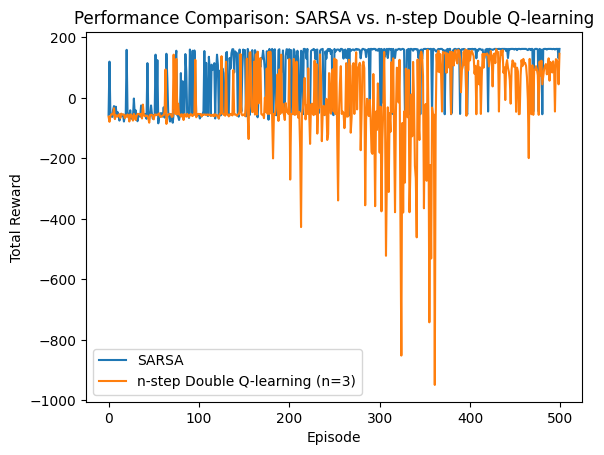

In [5]:
#Compare the performance of SARSA and n-step Double Q-learning algorithms
import numpy as np
import matplotlib.pyplot as plt

def train_sarsa(env, num_episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min):
    Q = np.zeros((env.grid_size[0], env.grid_size[1], env.action_space.n))
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()
        state_key = tuple(state)
        action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[state_key])

        total_reward = 0
        while True:
            next_state, reward, done, _ = env.step(action)
            next_state_key = tuple(next_state)
            next_action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[next_state_key])

            Q[state_key][action] += alpha * (reward + gamma * Q[next_state_key][next_action] - Q[state_key][action])

            state_key = next_state_key
            action = next_action
            total_reward += reward

            if done:
                break

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    return rewards_per_episode

def train_double_q_learning(env, n, num_episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min):
    Q1 = np.zeros((env.grid_size[0], env.grid_size[1], env.action_space.n))
    Q2 = np.zeros((env.grid_size[0], env.grid_size[1], env.action_space.n))
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()
        state_key = tuple(state)
        trajectory = []
        total_reward = 0

        while True:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                q_sum = Q1[state_key[0], state_key[1], :] + Q2[state_key[0], state_key[1], :]
                action = np.argmax(q_sum)

            next_state, reward, done, _ = env.step(action)
            next_state_key = tuple(next_state)
            trajectory.append((state_key, action, reward))
            total_reward += reward

            if len(trajectory) >= n or done:
                g = sum((gamma ** i) * trajectory[i][2] for i in range(len(trajectory)))
                if not done:
                    q_sum_next = Q1[next_state_key[0], next_state_key[1], :] + Q2[next_state_key[0], next_state_key[1], :]
                    g += (gamma ** n) * np.max(q_sum_next)

                update_state, update_action, _ = trajectory.pop(0)
                if np.random.rand() < 0.5:
                    Q1[update_state[0], update_state[1], update_action] += alpha * (g - Q1[update_state[0], update_state[1], update_action])
                else:
                    Q2[update_state[0], update_state[1], update_action] += alpha * (g - Q2[update_state[0], update_state[1], update_action])

            state_key = next_state_key

            if done:
                break

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    return rewards_per_episode

def compare_algorithms(env, num_episodes, max_steps, alpha, gamma, epsilon, epsilon_decay, epsilon_min, n):
    sarsa_rewards = train_sarsa(env, num_episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min)
    double_q_rewards = train_double_q_learning(env, n, num_episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min)

    plt.plot(sarsa_rewards, label='SARSA')
    plt.plot(double_q_rewards, label=f'n-step Double Q-learning (n={n})')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Performance Comparison: SARSA vs. n-step Double Q-learning')
    plt.legend()
    plt.show()

    return sarsa_rewards, double_q_rewards

env = SpaceMissionEnv()

num_episodes = 500
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.1
n = 3

sarsa_rewards, double_q_rewards = compare_algorithms(
    env, num_episodes, 100, alpha, gamma, epsilon, epsilon_decay, epsilon_min, n
)
